In [6]:
import pandas as pd

df = pd.read_csv('./GlobalLandTemperaturesByCity.csv')



In [109]:
pd.set_option('display.max_colwidth', None)

df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,ClimateZone,Year
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,Умеренный,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,Умеренный,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,Умеренный,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,Умеренный,2013
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,Умеренный,2013


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8235082 entries, 0 to 8599210
Data columns (total 8 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
 7   ClimateZone                    object 
dtypes: float64(2), object(6)
memory usage: 565.5+ MB


In [17]:
# Удалим строки с отсутствующими данными о температуре
df = df.dropna(subset=['AverageTemperature'])

In [26]:
import matplotlib.pyplot as plt 

# Функция для определения климатического пояса
def determine_climate_zone(latitude):
    """
    Определяет климатический пояс на основе широты.

    Параметры:
        latitude (str): Широта в формате "XX.XN" или "XX.XS" (градусы и направление).

    Возвращает:
        str: Название климатического пояса.
    """
    try:
        # Извлекаем значение градусов и направление
        lat_degree = float(latitude[:-1])
        direction = latitude[-1].upper()

        # Учитываем южное полушарие
        if direction == 'S':
            lat_degree = -lat_degree

        if abs(lat_degree) > 66.5:
            return 'Полярный'
        elif abs(lat_degree) > 60:
            return 'Субполярный'
        elif abs(lat_degree) > 23.5:
            return 'Умеренный'
        elif abs(lat_degree) > 10:
            return 'Субтропический'
        else:
            return 'Тропический'
    except ValueError:
        return "Неверный формат широты"
    

# Добавление климатического пояса в DataFrame
df['ClimateZone'] = df['Latitude'].apply(determine_climate_zone)

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,ClimateZone
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,Умеренный
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,Умеренный
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,Умеренный
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,Умеренный
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,Умеренный


In [27]:
# Преобразование столбца dt в формат даты
df['dt'] = pd.to_datetime(df['dt'])


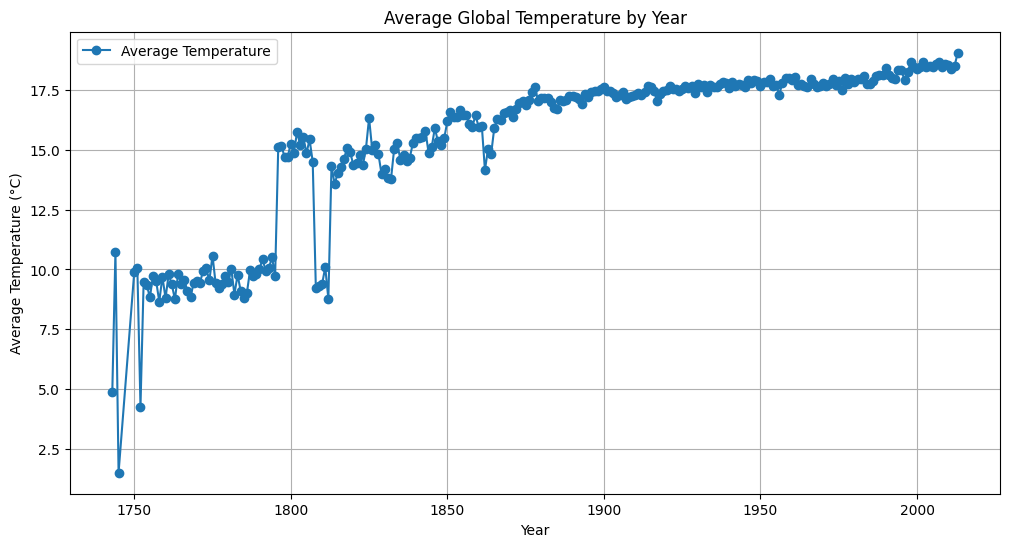

In [51]:
# ======================== 2. Нарисуйте несколько графиков для станций из разных климатических поясов. 
# ======================== Отобразите на линейном графике температуру и атмосферное давление. 
# ======================== Используйте subplots.

# Построение линейного графика средней температуры по годам
# Агрегирование данных: средняя температура по годам
df['Year'] = df['dt'].dt.year
yearly_avg_temp = df.groupby('Year')['AverageTemperature'].mean().reset_index()

# Построение линейного графика средней температуры по годам
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp['Year'], yearly_avg_temp['AverageTemperature'], marker='o', label='Average Temperature')
plt.title('Average Global Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


In [42]:
# Извлечение по одному городу из каждого климатического пояса
sample_cities = df.groupby('ClimateZone')['City'].first().to_dict()
print(f"Пример городов по климатическим поясам: {sample_cities}")


Пример городов по климатическим поясам: {'Полярный': 'Murmansk', 'Субполярный': 'Anchorage', 'Субтропический': 'Abha', 'Тропический': 'Aba', 'Умеренный': 'Århus'}


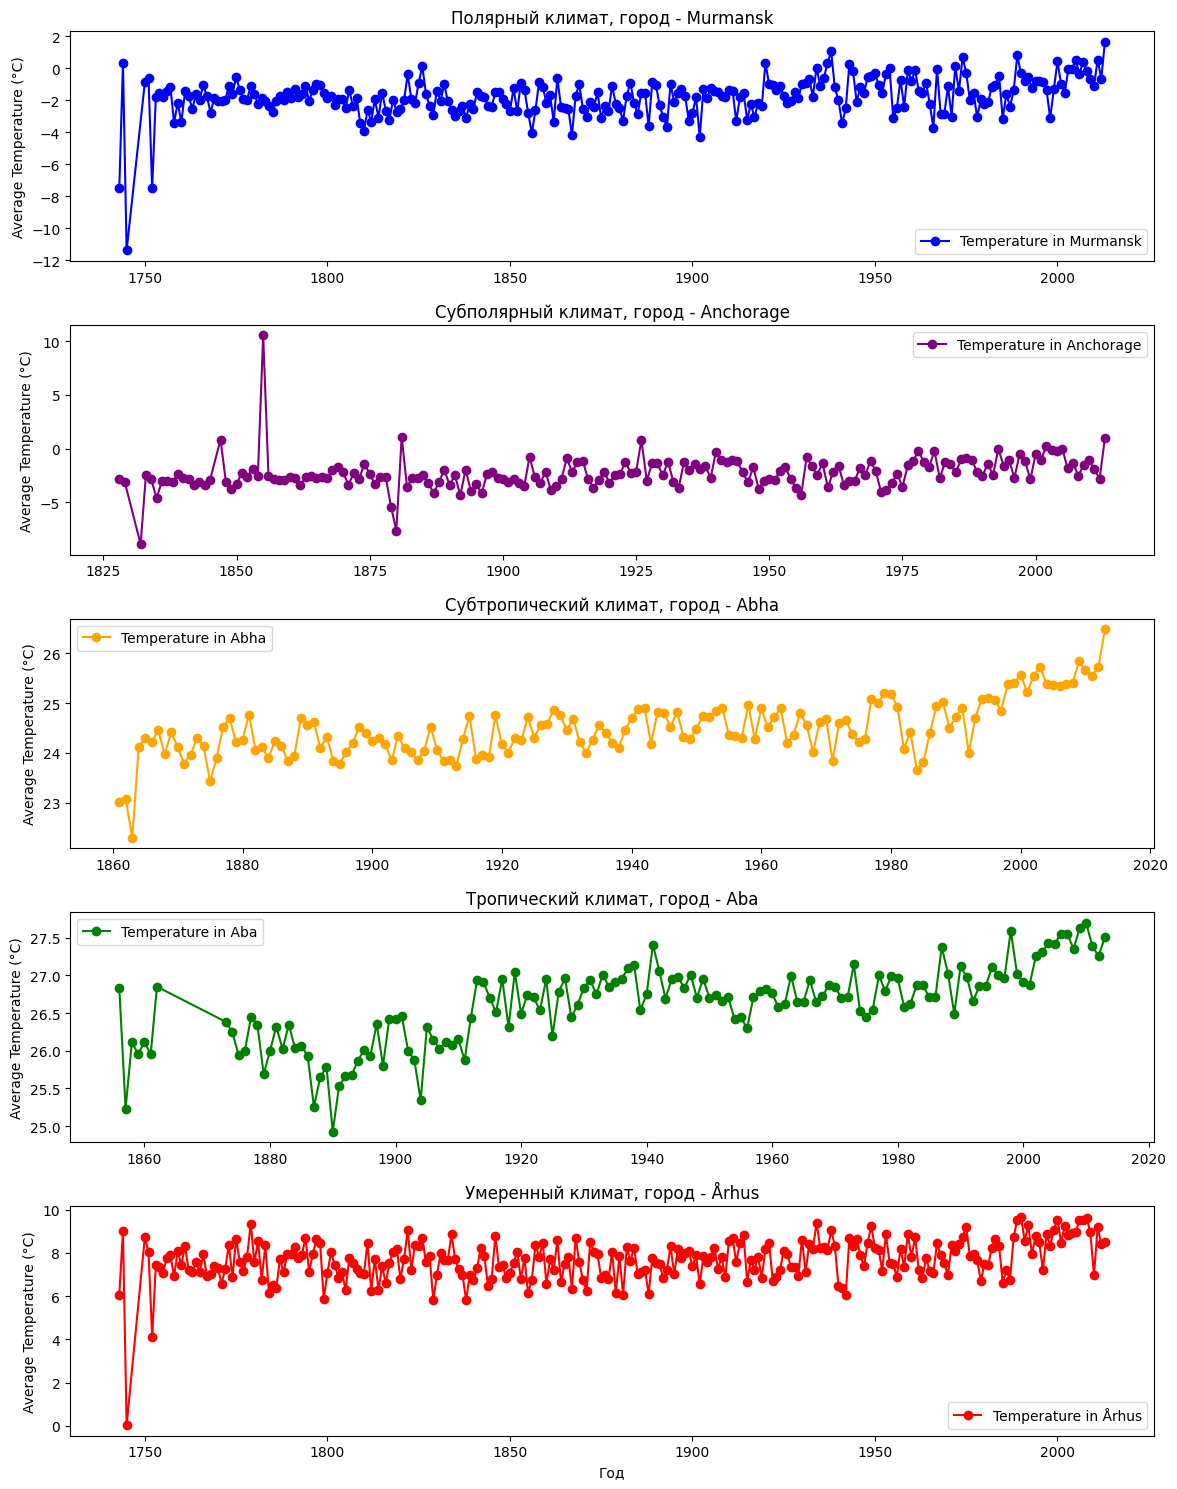

In [48]:
# Выбор городов из разных климатических поясов
cities = {
    'Полярный': 'Murmansk',
    'Субполярный': 'Anchorage',
    'Субтропический': 'Abha',
    'Тропический': 'Aba',
    'Умеренный': 'Århus'
}

# Задание цветов для климатических поясов
zone_colors = {
    'Полярный': 'blue',
    'Субполярный': 'purple',
    'Субтропический': 'orange',
    'Тропический': 'green',
    'Умеренный': 'red'
}

# Построение графиков
fig, axes = plt.subplots(len(cities), 1, figsize=(12, 15), sharex=False)

for i, (zone, city) in enumerate(cities.items()):
    city_data = df[df['City'] == city]
    city_data = city_data.copy()  # Создаем копию для избежания предупреждений
    city_data['Year'] = city_data['dt'].dt.year
    yearly_city_temp = city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
    
    axes[i].plot(yearly_city_temp['Year'], yearly_city_temp['AverageTemperature'], label=f'Temperature in {city}', marker='o', color=zone_colors[zone])
    axes[i].set_title(f'{zone} климат, город - {city}')
    axes[i].set_ylabel('Average Temperature (°C)')
    axes[i].legend()

axes[-1].set_xlabel('Год')
plt.tight_layout()
plt.show()

Основные статистики по температуре:
count    8,235,082.0
mean            16.7
std             10.4
min            -42.7
25%             10.3
50%             18.8
75%             25.2
max             39.7
Name: AverageTemperature, dtype: object


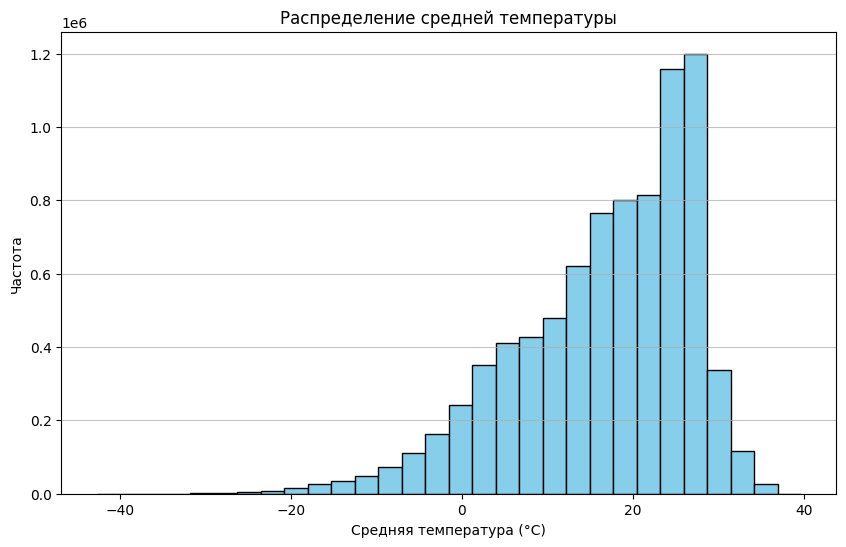

In [56]:
### ========================  3. Описательный анализ данных

# 1. Основные статистики
print("Основные статистики по температуре:")
print(df['AverageTemperature'].describe().apply(lambda x: f'{x:,.1f}'))

# 2. Гистограмма температуры
plt.figure(figsize=(10, 6))
plt.hist(df['AverageTemperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение средней температуры')
plt.xlabel('Средняя температура (°C)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

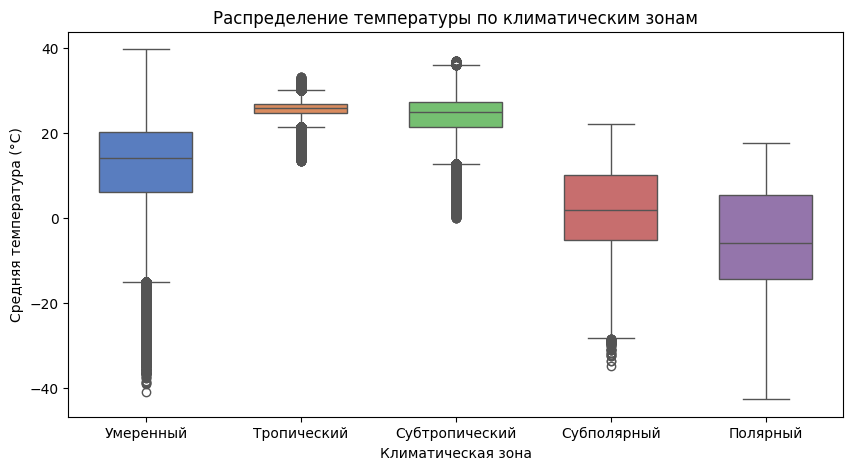

In [66]:
import seaborn as sns

# Ящики с усами для температур по климатическим зонам
plt.figure(figsize=(10, 5))
sns.boxplot(x='ClimateZone', y='AverageTemperature', data=df, hue='ClimateZone', palette='muted', dodge=False, width=0.6)
plt.title('Распределение температуры по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Средняя температура (°C)')
plt.show()

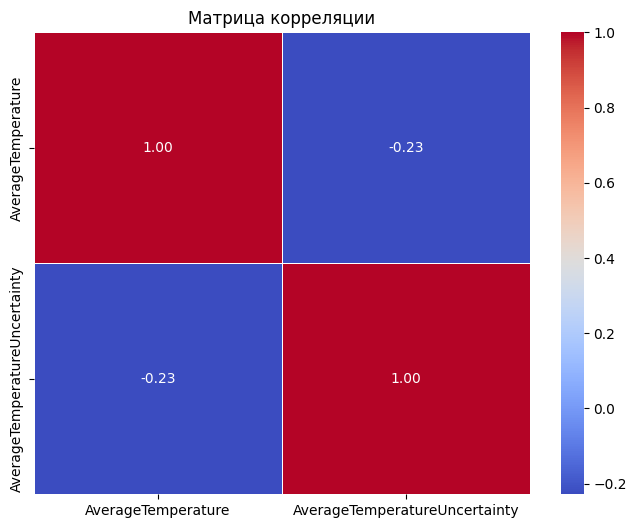

In [69]:
### ============================ 4. Отобразите матрицу корреляции. Сделайте выводы.

# 4. Матрица корреляции
# Создадим матрицу корреляции для числовых данных
correlation_matrix = df[['AverageTemperature', 'AverageTemperatureUncertainty']].corr()

# Построим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

# Выводы:
# - по диагонали 1.0 равны; потому что кореллирует сам на себя
# Отрицательная корреляция "-0.23" между AverageTemperature и AverageTemperatureUncertainty указывает на слабую обратную связь. 
# с увеличением средней температуры отклонение уменьшается. Возможно что более высокие температуры точны в погрешности.


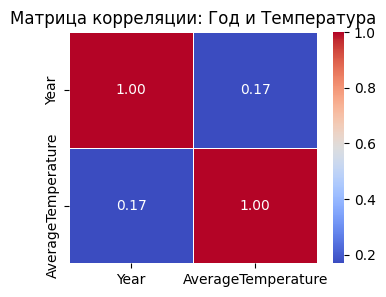

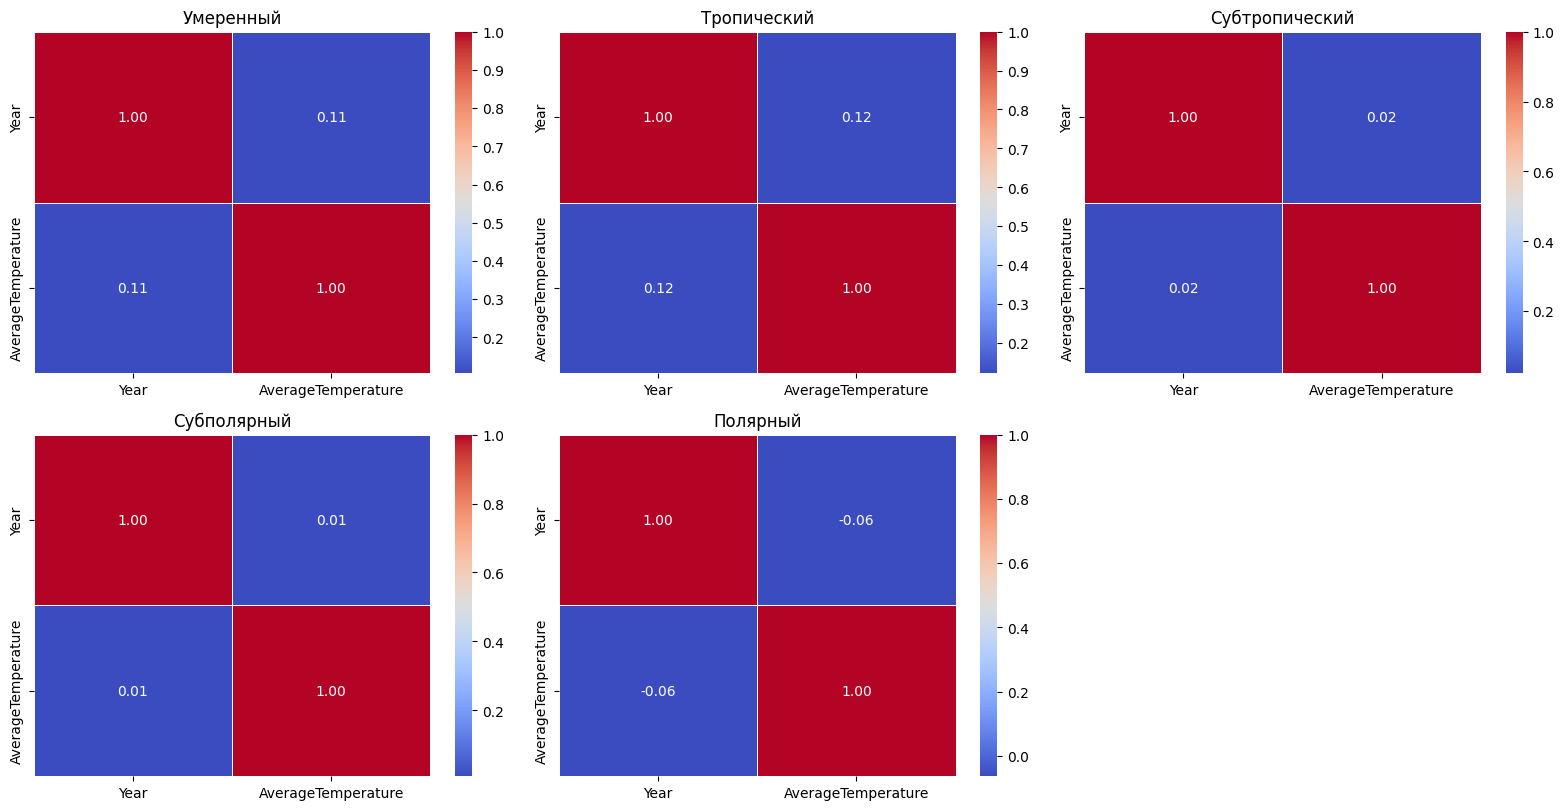

In [88]:
# 4. Матрица корреляции Год:Температура

# Создадим матрицу корреляции по годам и средней температуры
correlation_matrix_year_temp = df[['Year', 'AverageTemperature']].corr()

# тепловая карта
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix_year_temp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции: Год и Температура')
plt.show()


# матрицы корреляции по климатическим зонам
zones = df['ClimateZone'].unique()
fig, axes = plt.subplots(len(zones) // 2 + len(zones) % 2, 3, figsize=(16, 12))
axes = axes.flatten()

for i, zone in enumerate(zones):
    zone_data = df[(df['ClimateZone'] == zone)]
    correlation_matrix = zone_data[['Year', 'AverageTemperature']].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'{zone}')
    
# удаление пустых графиков
for j in range(len(zones), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Выводы:
# - корреляция показывает зависимость увеличения и уменьшения показателей между Годом и Средней температурой. 
# - С увеличением года наблюдается слабая корелляция увеличения температуры
# - Большее влияние 0.11 и 0.12 имеет тропическая и Умеренная зона
# - отрицательная корелляция в полярной зоне указывает что с годами температура там понижалась

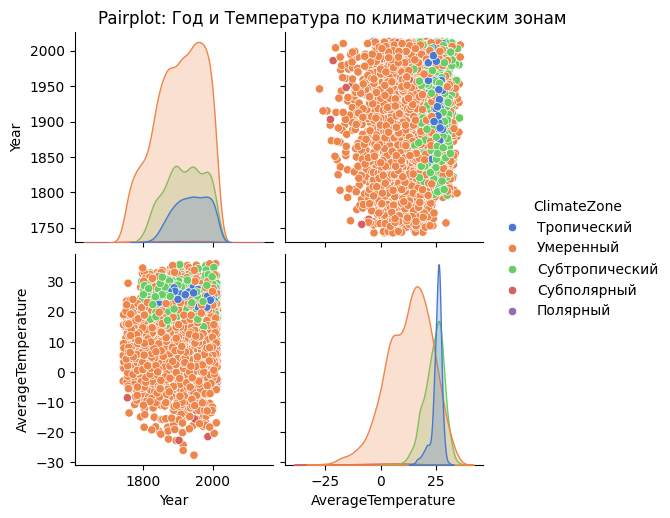

In [100]:
# ==================================== 5. Pairplot для корреляции температуры и года

pairplot = sns.pairplot(df.sample(5000, random_state=42), vars=['Year', 'AverageTemperature'], hue='ClimateZone', palette='muted', diag_kind='kde')
pairplot.fig.suptitle('Pairplot: Год и Температура по климатическим зонам', y=1.02)
plt.show()


# Диагональные графики (KDE - kernel density estimation) показывают плотность распределения значений
# Тут, точечные графики:
# Для каждой климатической зоны используется свой цвет
# Тропическая зона (зеленые точки) имеет более стабильный температурный диапазон
# Умеренная зона берет широкий диапазон температур, как плюсовые так и отрицательные значения
# Субполярные и полярные зоны имеют в отрицательной температуре
# Можно заметить общий тренд в изменении температуры по времени, к примеру, в тропической зоне температуры остаются относительно постоянными

In [107]:
# ==================================== 6. Проведите работу над пустыми значениями

# Ранее по этому датасету были очищены:
# - Записи с AverageTemperature is null
# - Конвертировано поле Даты в тип datetime


print("Количество столбцов с нуллами:")
print(df.isna().sum())

Количество столбцов с нуллами:
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
ClimateZone                      0
Year                             0
dtype: int64


In [123]:
# ==================================== 7. Найдите в данных выбросы. Обоснуйте свои результаты


# Scatter Plot для выявления выбросов
plt.figure(figsize=(10, 6))

temp_zone_city_df = df[(df['City'] == 'Århus') & (df['ClimateZone'] == 'Умеренный')]

temp_zone_city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,ClimateZone,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,Умеренный,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,Умеренный,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,Умеренный,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,Умеренный,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,Умеренный,1744
...,...,...,...,...,...,...,...,...,...
3233,2013-04-01,5.514,0.330,Århus,Denmark,57.05N,10.33E,Умеренный,2013
3234,2013-05-01,12.770,0.549,Århus,Denmark,57.05N,10.33E,Умеренный,2013
3235,2013-06-01,15.223,0.322,Århus,Denmark,57.05N,10.33E,Умеренный,2013
3236,2013-07-01,18.259,0.314,Århus,Denmark,57.05N,10.33E,Умеренный,2013


<Figure size 1000x600 with 0 Axes>

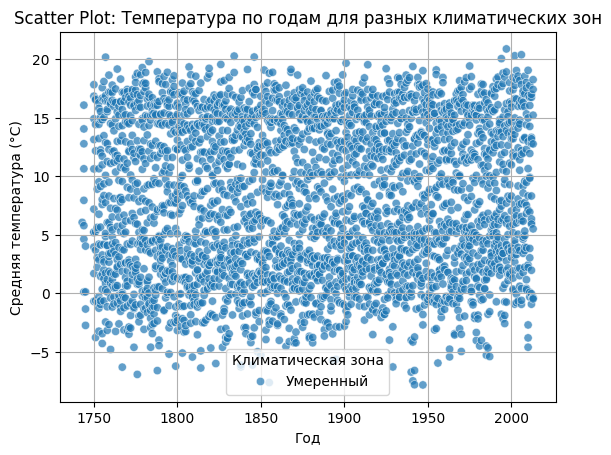

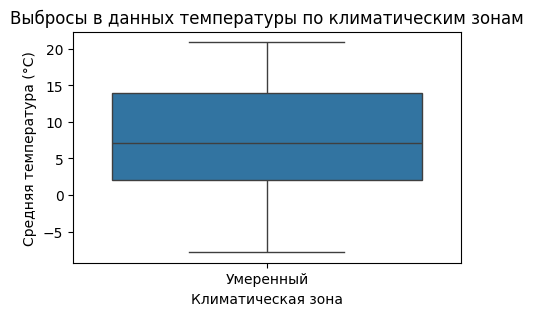

In [131]:
sns.scatterplot(x='Year', y='AverageTemperature', hue='ClimateZone', data=temp_zone_city_df, alpha=0.7)
plt.title('Scatter Plot: Температура по годам для разных Умеренной зоны')
plt.xlabel('Год')
plt.ylabel('Средняя температура (°C)')
plt.legend(title='Климатическая зона')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='ClimateZone', y='AverageTemperature', data=temp_zone_city_df, legend=False)
plt.title('Выбросы в данных температуры по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Средняя температура (°C)')
plt.show()

Количество выбросов (по сигмам): 286


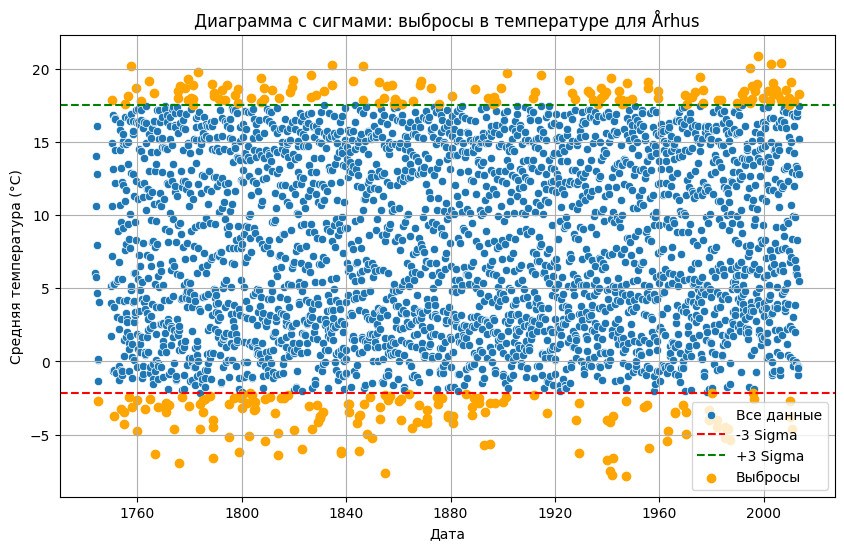

In [149]:
temp_zone_city_df = df[df['City'] == 'Århus']  # фильтр для города Århus
mean_temp = temp_zone_city_df['AverageTemperature'].mean()
std_temp = temp_zone_city_df['AverageTemperature'].std()

# sigma
lower_bound = mean_temp - 1.5 * std_temp
upper_bound = mean_temp + 1.5 * std_temp

# выбросы
outliers_sigma = temp_zone_city_df[(temp_zone_city_df['AverageTemperature'] < lower_bound) | 
                                    (temp_zone_city_df['AverageTemperature'] > upper_bound)]

print(f"Количество выбросов (по сигмам): {len(outliers_sigma)}")

# draw 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dt', y='AverageTemperature', data=temp_zone_city_df, label='Все данные')
plt.axhline(lower_bound, color='red', linestyle='--', label='-3 Sigma')
plt.axhline(upper_bound, color='green', linestyle='--', label='+3 Sigma')
plt.scatter(outliers_sigma['dt'], outliers_sigma['AverageTemperature'], color='orange', label='Выбросы')
plt.title('Диаграмма с сигмами: выбросы в температуре для Århus')
plt.xlabel('Дата')
plt.ylabel('Средняя температура (°C)')
plt.legend()
plt.grid(True)
plt.show()

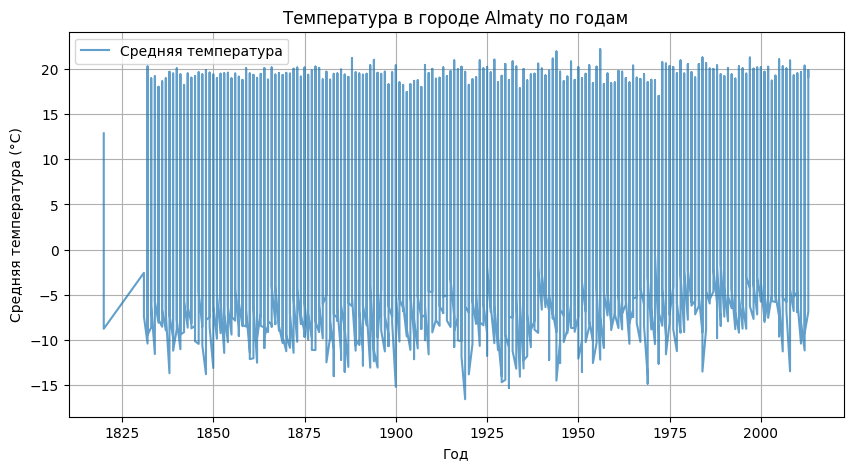

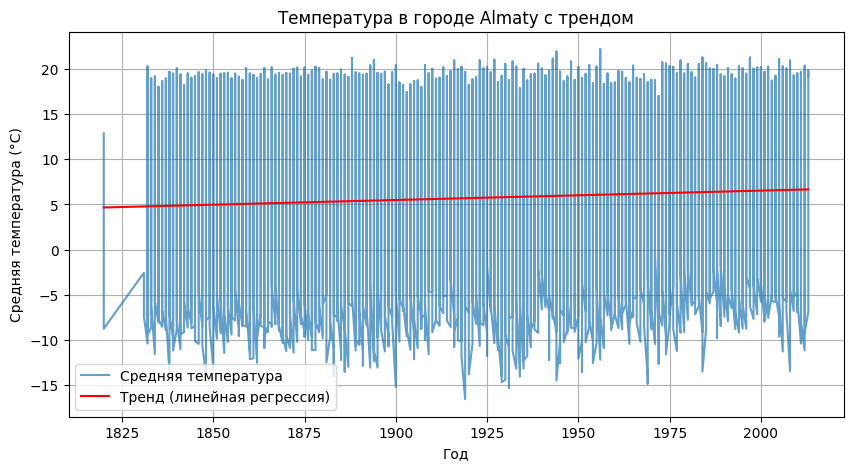

Выводы: 
Уклон (slope): 0.0104
p-значение: 1.3247e-02
Коэффициент детерминации (R^2): 0.0028
Гипотеза о наличии тренда подтверждается: температура изменяется со временем
Температура увеличивается, что указывает на глобальное потепление


In [169]:
# ============================================== 8. Сформулируйте статистическую гипотезу для проверки наличия потепления. 
# Обоснуйте выбор критерия. 
# Выясните, есть ли в данных тренд (наблюдаем ли мы глобальное потепление или похолодание?)

from scipy.stats import linregress

# Фильтрация данных для города Almaty
almaty_city_data = df[(df['City'] == 'Almaty') & (df['Year'] > 1800)]

# Построение временного ряда для температуры в городе Abha
plt.figure(figsize=(10, 5))
plt.plot(almaty_city_data['Year'], almaty_city_data['AverageTemperature'], label='Средняя температура', alpha=0.7)
plt.title('Температура в городе Almaty по годам')
plt.xlabel('Год')
plt.ylabel('Средняя температура (°C)')
plt.grid(True)
plt.legend()
plt.show()

# Гипотеза: Температура в городе Almaty увеличивается со временем (глобальное потепление).
# Используем линейную регрессию для проверки тренда.

# Выполнение линейной регрессии
slope, intercept, r_value, p_value, std_err = linregress(almaty_city_data['Year'], almaty_city_data['AverageTemperature'])

print()

# Визуализация тренда
plt.figure(figsize=(10, 5))
plt.plot(almaty_city_data['Year'], almaty_city_data['AverageTemperature'], label='Средняя температура', alpha=0.7)
plt.plot(almaty_city_data['Year'], intercept + slope * almaty_city_data['Year'], color='red', label='Тренд (линейная регрессия)')
plt.title('Температура в городе Almaty с трендом')
plt.xlabel('Год')
plt.ylabel('Средняя температура (°C)')
plt.grid(True)
plt.legend()
plt.show()

print('Выводы: ')

print(f"Уклон (slope): {slope:.4f}") # показатель скорости изменения температуры со временем, ниже нуля потепление, выше - похолодание
print(f"p-значение: {p_value:.4e}")  # показывает считается ли тренд статистически значимым
print(f"Коэффициент детерминации (R^2): {r_value**2:.4f}")  # коэффициент корреляции


if p_value < 0.05:
    print("Гипотеза о наличии тренда подтверждается: температура изменяется со временем")
    if slope > 0:
        print("Температура увеличивается, что указывает на глобальное потепление")
    else:
        print("Температура уменьшается, что указывает на похолодание")
else:
    print("Гипотеза о наличии тренда не подтверждается: изменение температуры со временем незначительно")

# использовала линейную регрессию, 
# потому что это простой и эффективный метод для выявления тренда в данных (изменение показателей со временем)
# тренд здесь - это глобальное потепление или похолодание по городу Алматы

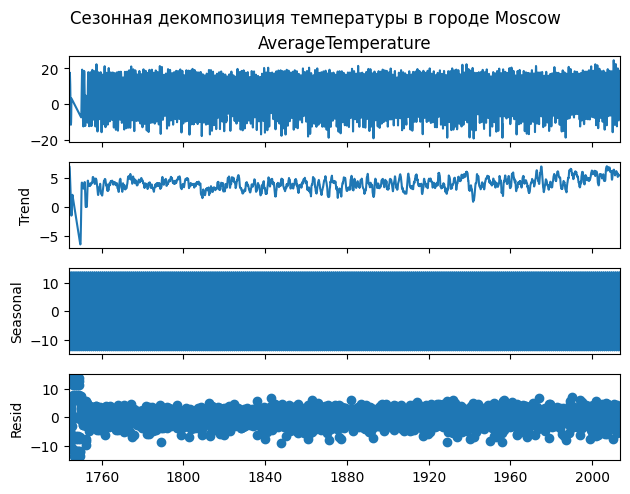

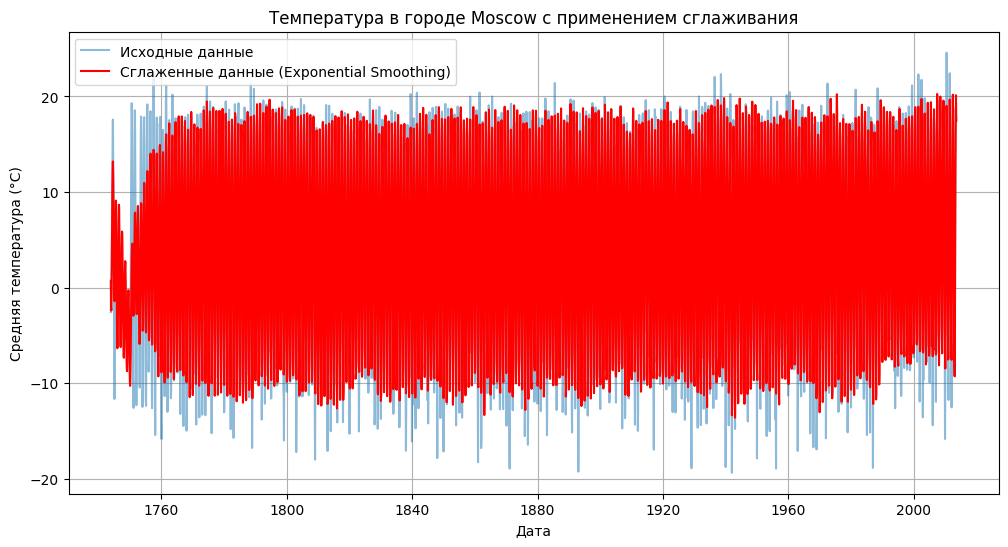

Результаты линейной регрессии на сглаженных данных:
Уклон (slope): 0.0071
p-значение: 1.1825e-15
Коэффициент детерминации (R^2): 0.2124
Гипотеза о наличии тренда подтверждается: температура изменяется со временем.
Температура увеличивается, что указывает на глобальное потепление.


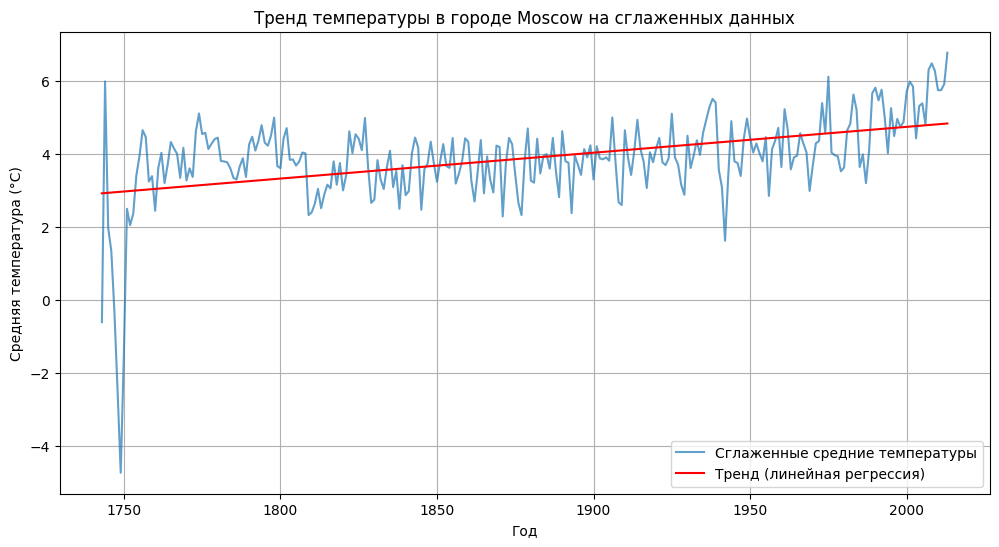

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

# Фильтрация данных для города Moscow
city_data = df[df['City'] == 'Moscow'].set_index('dt').asfreq('MS')
city_data['AverageTemperature'] = city_data['AverageTemperature'].interpolate(method='linear')

# Сезонное декомпозиционное усреднение
# тренд показывает долгосрочную динамику температур
# Seasonal показывает регулярные изменения, связанные с временем года
# Resid выявляет шумы и аномалии, которые могут быть вызваны экстремальными погодными событиями или ошибкой измерений
result = seasonal_decompose(city_data['AverageTemperature'], model='additive', period=12)

# Визуализация сезонной декомпозиции
result.plot()
plt.suptitle('Сезонная декомпозиция температуры в городе Moscow', y=1.02)
plt.show()

# Применение модели экспоненциального сглаживания
model = ExponentialSmoothing(city_data['AverageTemperature'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
city_data['Smoothed'] = fitted_model.fittedvalues

# Построение временного ряда с усреднением
plt.figure(figsize=(12, 6))
plt.plot(city_data.index, city_data['AverageTemperature'], label='Исходные данные', alpha=0.5)
plt.plot(city_data.index, city_data['Smoothed'], label='Сглаженные данные (Exponential Smoothing)', color='red')

plt.title('Температура в городе Moscow с применением сглаживания')
plt.xlabel('Дата')
plt.ylabel('Средняя температура (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Проверка тренда с использованием сглаженных данных
city_data['Year'] = city_data.index.year
avg_temp_per_year = city_data.groupby('Year')['Smoothed'].mean().reset_index()
slope, intercept, r_value, p_value, std_err = linregress(avg_temp_per_year['Year'], avg_temp_per_year['Smoothed'])

print("Результаты линейной регрессии на сглаженных данных:")
print(f"Уклон (slope): {slope:.4f}")
print(f"p-значение: {p_value:.4e}")
print(f"Коэффициент детерминации (R^2): {r_value**2:.4f}")

# Интерпретация результата
if p_value < 0.05:
    print("Гипотеза о наличии тренда подтверждается: температура изменяется со временем.")
    if slope > 0:
        print("Температура увеличивается, что указывает на глобальное потепление.")
    else:
        print("Температура уменьшается, что указывает на похолодание.")
else:
    print("Гипотеза о наличии тренда не подтверждается: изменение температуры со временем незначительно.")

# Визуализация тренда на сглаженных данных
plt.figure(figsize=(12, 6))
plt.plot(avg_temp_per_year['Year'], avg_temp_per_year['Smoothed'], label='Сглаженные средние температуры', alpha=0.7)
plt.plot(avg_temp_per_year['Year'], intercept + slope * avg_temp_per_year['Year'], color='red', label='Тренд (линейная регрессия)')
plt.title('Тренд температуры в городе Moscow на сглаженных данных')
plt.xlabel('Год')
plt.ylabel('Средняя температура (°C)')
plt.grid(True)
plt.legend()
plt.show()

In [183]:
# По графику с анализом температуры для г Москва:

# По линейной регрессии:
# Уклон (slope) = 0.0071 (что средняя температура в Москве увеличивается примерно на 0.0071°C в год)
# p-значение, очень низкое (1.1825e-15)
# Коэффициент детерминации 21.24%, имеется наличие других факторов, влияющих на температуру

# Гипотеза о тренде:
# Гипотеза о наличии тренда подтверждена, p-значение меньше 0.05, а положительный уклон указывает на потепление в Москве

# Графическое представление:
# синяя линия, температура в Москве имеет значительные колебания, но в целом демонстрирует тенденцию к увеличению
# красная линия, четко демонстрирует долгосрочное увеличение температуры в городе

# 4. Вывод:
# В Москве наблюдается долгосрочный тренд глобального потепления, хотя часть изменений температуры не объясняется линейным трендом
